In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [68]:
%%R

require(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [13]:
# show all columns in the dataframe

pd.set_option('display.max_columns', None)

In [31]:
df_counts = pd.read_csv('smoke_shops_census_updated_final_2.csv')
df_counts

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,med_age_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,census_tract,counts
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,36005000200,2
1,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,36005000400,4
2,36005001600,Census Tract 16; Bronx County; New York,43.9,6177,6177,2292,41362,454,1751,15.0,3.3,618,618,628,11967,145,276,5.9,36005001600,2
3,36005001901,Census Tract 19.01; Bronx County; New York,32.4,2181,2181,1125,49500,0,940,28.6,2.2,258,258,292,19070,13,108,9.9,36005001901,1
4,36005001902,Census Tract 19.02; Bronx County; New York,35.2,1883,1883,426,67375,71,397,32.3,5.2,458,458,121,24301,42,98,13.0,36005001902,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,36085029105,Census Tract 291.05; Richmond County; New York,35.4,4666,4666,218,111276,1141,481,7.3,3.8,809,809,197,19788,266,161,4.5,36085029105,3
1656,36085030301,Census Tract 303.01; Richmond County; New York,40.6,5915,5915,141,111700,1374,654,3.1,2.6,714,714,99,29793,196,217,1.8,36085030301,2
1657,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,36085030302,8
1658,36085031902,Census Tract 319.02; Richmond County; New York,35.1,5053,5053,2592,75057,879,706,22.8,3.6,642,642,725,35652,153,137,8.7,36085031902,1


In [121]:
# create a new column that by dividing renters by owners
df_counts['renters_to_owners'] = df_counts['renters_estimate'] / df_counts['owners_estimate']

In [122]:
# create a new column 'perc_ethnic' by dividing white_estimate by total_race_estimate, then subtracting the result from 1
df_counts['perc_ethnic'] = (1 - (df_counts['white_estimate'] / df_counts['total_race_estimate'])) * 100

In [51]:
df_counts[df_counts['census_tract'] == 36005001901]

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,med_age_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,census_tract,counts,renters_to_owners,perc_ethnic
3,36005001901,Census Tract 19.01; Bronx County; New York,32.4,2181,2181,1125,49500,0,940,28.6,2.2,258,258,292,19070,13,108,9.9,36005001901,1,inf,48.418157


# There are 0s in owners, which make a ratio an inappropriate mathematical formula

In [52]:
df_counts[df_counts['owners_estimate'] == 0]

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,med_age_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,census_tract,counts,renters_to_owners,perc_ethnic
3,36005001901,Census Tract 19.01; Bronx County; New York,32.4,2181,2181,1125,49500,0,940,28.6,2.2,258,258,292,19070,13,108,9.9,36005001901,1,inf,48.418157
5,36005002300,Census Tract 23; Bronx County; New York,32.4,4528,4528,1936,19743,0,1923,47.3,4.0,596,596,526,6261,13,201,10.9,36005002300,1,inf,57.243816
24,36005005300,Census Tract 53; Bronx County; New York,23.1,5379,5379,3115,26437,0,1634,49.9,5.1,769,769,835,7350,19,167,12.3,36005005300,3,inf,42.089608
43,36005007900,Census Tract 79; Bronx County; New York,28.6,7086,7086,2457,34604,0,2332,31.6,6.9,1021,1021,830,14454,19,254,9.8,36005007900,7,inf,65.325995
69,36005014300,Census Tract 143; Bronx County; New York,36.9,1715,1715,807,16678,0,696,41.6,4.8,301,301,230,4826,13,79,12.4,36005014300,1,inf,52.944606
85,36005016500,Census Tract 165; Bronx County; New York,32.3,1134,1134,700,46179,0,333,23.9,4.7,237,237,258,9620,13,44,9.8,36005016500,2,inf,38.271605
90,36005017500,Census Tract 175; Bronx County; New York,33.9,6116,6116,3365,26463,0,2831,30.4,4.8,900,900,925,9672,19,380,13.3,36005017500,7,inf,44.980379
94,36005017902,Census Tract 179.02; Bronx County; New York,29.2,3816,3816,2022,41475,0,1319,24.7,6.9,930,930,635,9935,13,224,12.7,36005017902,2,inf,47.012579
99,36005018501,Census Tract 185.01; Bronx County; New York,34.1,2783,2783,1688,50177,0,1240,32.6,16.3,564,564,427,31520,13,220,11.5,36005018501,5,inf,39.346029
105,36005019700,Census Tract 197; Bronx County; New York,32.2,7830,7830,1864,34871,0,2513,50.7,6.5,1083,1083,528,20517,19,410,13.0,36005019700,7,inf,76.194125


# use number of owners as a percentage instead

In [54]:
df_counts['perc_owners']  = (df_counts['owners_estimate'] / (df_counts['renters_estimate'] + df_counts['owners_estimate'])) * 100
df_counts

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,med_age_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,census_tract,counts,renters_to_owners,perc_ethnic,perc_owners
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,36005000200,2,0.660839,69.753593,60.210526
1,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,36005000400,4,0.638751,69.681956,61.022087
2,36005001600,Census Tract 16; Bronx County; New York,43.9,6177,6177,2292,41362,454,1751,15.0,3.3,618,618,628,11967,145,276,5.9,36005001600,2,3.856828,62.894609,20.589569
3,36005001901,Census Tract 19.01; Bronx County; New York,32.4,2181,2181,1125,49500,0,940,28.6,2.2,258,258,292,19070,13,108,9.9,36005001901,1,inf,48.418157,0.000000
4,36005001902,Census Tract 19.02; Bronx County; New York,35.2,1883,1883,426,67375,71,397,32.3,5.2,458,458,121,24301,42,98,13.0,36005001902,2,5.591549,77.376527,15.170940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,36085029105,Census Tract 291.05; Richmond County; New York,35.4,4666,4666,218,111276,1141,481,7.3,3.8,809,809,197,19788,266,161,4.5,36085029105,3,0.421560,95.327904,70.345253
1656,36085030301,Census Tract 303.01; Richmond County; New York,40.6,5915,5915,141,111700,1374,654,3.1,2.6,714,714,99,29793,196,217,1.8,36085030301,2,0.475983,97.616230,67.751479
1657,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,36085030302,8,0.248496,74.599937,80.096386
1658,36085031902,Census Tract 319.02; Richmond County; New York,35.1,5053,5053,2592,75057,879,706,22.8,3.6,642,642,725,35652,153,137,8.7,36085031902,1,0.803185,48.703740,55.457413


# using a smaller df

In [55]:
df_clean = df_counts[['census_tract', 'med_inc_estimate', 'med_age_estimate', 'perc_poverty_estimate', 'perc_owners', 'perc_ethnic', 'counts']]
df_clean

,census_tract,med_inc_estimate,med_age_estimate,perc_poverty_estimate,perc_owners,perc_ethnic,counts
0,36005000200,115064,40.7,14.1,60.210526,69.753593,2
1,36005000400,100553,36.3,6.0,61.022087,69.681956,4
2,36005001600,41362,43.9,15.0,20.589569,62.894609,2
3,36005001901,49500,32.4,28.6,0.000000,48.418157,1
4,36005001902,67375,35.2,32.3,15.170940,77.376527,2
...,...,...,...,...,...,...,...
1655,36085029105,111276,35.4,7.3,70.345253,95.327904,3
1656,36085030301,111700,40.6,3.1,67.751479,97.616230,2
1657,36085030302,98535,37.9,14.1,80.096386,74.599937,8
1658,36085031902,75057,35.1,22.8,55.457413,48.703740,1


In [56]:
#export df_clean as csv
df_clean.to_csv('smoke_shops_census_updated_clean_fixed.csv', index=False)

In [58]:
%%R

df = read.csv('smoke_shops_census_updated_clean_fixed.csv')
head(df)



  census_tract med_inc_estimate med_age_estimate perc_poverty_estimate
1   3.6005e+10           115064             40.7                  14.1
2   3.6005e+10           100553             36.3                   6.0
3   3.6005e+10            41362             43.9                  15.0
4   3.6005e+10            49500             32.4                  28.6
5   3.6005e+10            67375             35.2                  32.3
6   3.6005e+10            19743             32.4                  47.3
  perc_owners perc_ethnic counts
1    60.21053    69.75359      2
2    61.02209    69.68196      4
3    20.58957    62.89461      2
4     0.00000    48.41816      1
5    15.17094    77.37653      2
6     0.00000    57.24382      1


In [61]:
%%R

#require ggplot
library(ggplot2)

`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = counts ~ med_age_estimate, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8801 -1.6544 -0.5186  1.1499 13.7859 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.881108   0.334640  17.574  < 2e-16 ***
med_age_estimate -0.070000   0.008668  -8.075 1.28e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.28 on 1658 degrees of freedom
Multiple R-squared:  0.03784,	Adjusted R-squared:  0.03726 
F-statistic: 65.21 on 1 and 1658 DF,  p-value: 1.282e-15



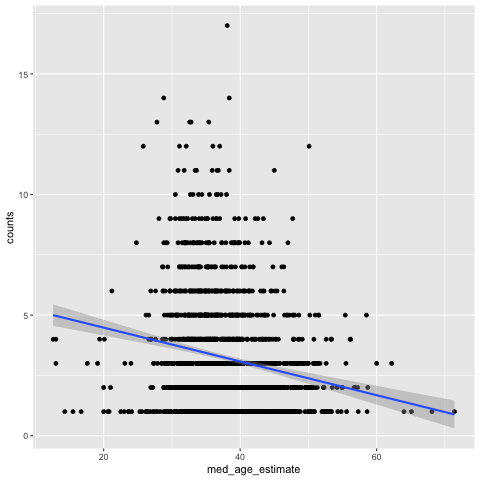

In [74]:
%%R 

plt <- ggplot(df, aes(x = med_age_estimate, y = counts)) + geom_point() + geom_smooth(method = 'lm')
print(plt)

model <- lm(counts ~ med_age_estimate, data = df)
summary(model)

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = counts ~ med_inc_estimate, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7494 -1.7447 -0.5333  1.0691 13.5293 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.836e+00  1.378e-01  27.841  < 2e-16 ***
med_inc_estimate -7.631e-06  1.547e-06  -4.932 8.95e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.308 on 1658 degrees of freedom
Multiple R-squared:  0.01446,	Adjusted R-squared:  0.01387 
F-statistic: 24.33 on 1 and 1658 DF,  p-value: 8.946e-07



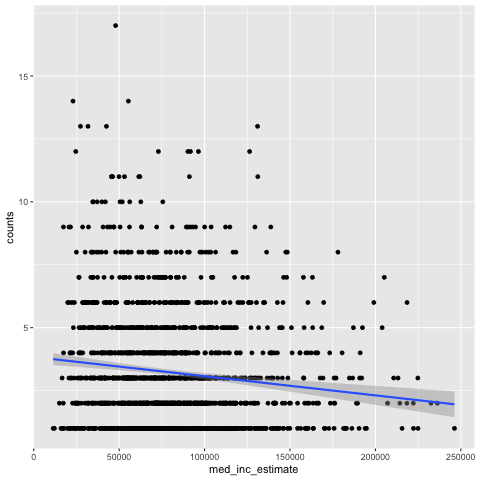

In [75]:
%%R 

plt <- ggplot(df, aes(x = med_inc_estimate, y = counts)) + geom_point() + geom_smooth(method = 'lm')
print(plt)

model <- lm(counts ~ med_inc_estimate, data = df)
summary(model)

`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = counts ~ perc_owners, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0786 -1.6041 -0.5661  1.1191 13.3601 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.078625   0.098930   41.23   <2e-16 ***
perc_owners -0.024341   0.002318  -10.50   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.251 on 1658 degrees of freedom
Multiple R-squared:  0.06236,	Adjusted R-squared:  0.06179 
F-statistic: 110.3 on 1 and 1658 DF,  p-value: < 2.2e-16



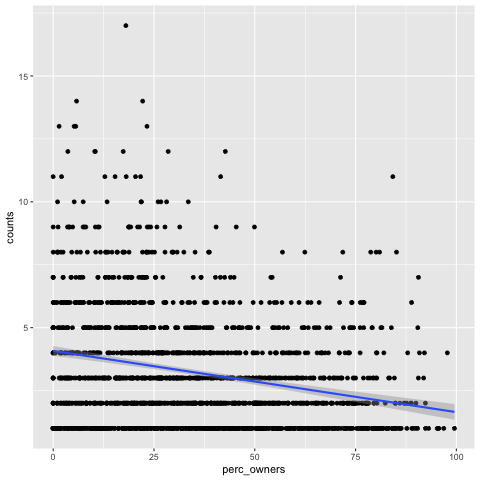

In [125]:
%%R 

plot <- ggplot(df, aes(x = perc_owners, y = counts)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(counts ~ perc_owners, data = df)
summary(model)

In [127]:
%%R

model <- lm(counts ~ med_age_estimate + perc_poverty_estimate + perc_owners + perc_ethnic, data = df)
summary(model)


Call:
lm(formula = counts ~ med_age_estimate + perc_poverty_estimate + 
    perc_owners + perc_ethnic, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7214 -1.5709 -0.5303  1.0831 13.3168 

Coefficients:


                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.523498   0.429068  10.543  < 2e-16 ***
med_age_estimate      -0.033418   0.009766  -3.422 0.000637 ***
perc_poverty_estimate  0.013867   0.006000   2.311 0.020949 *  
perc_owners           -0.016549   0.002993  -5.529 3.73e-08 ***
perc_ethnic            0.004166   0.002103   1.981 0.047754 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.239 on 1655 degrees of freedom
Multiple R-squared:  0.07403,	Adjusted R-squared:  0.0718 
F-statistic: 33.08 on 4 and 1655 DF,  p-value: < 2.2e-16



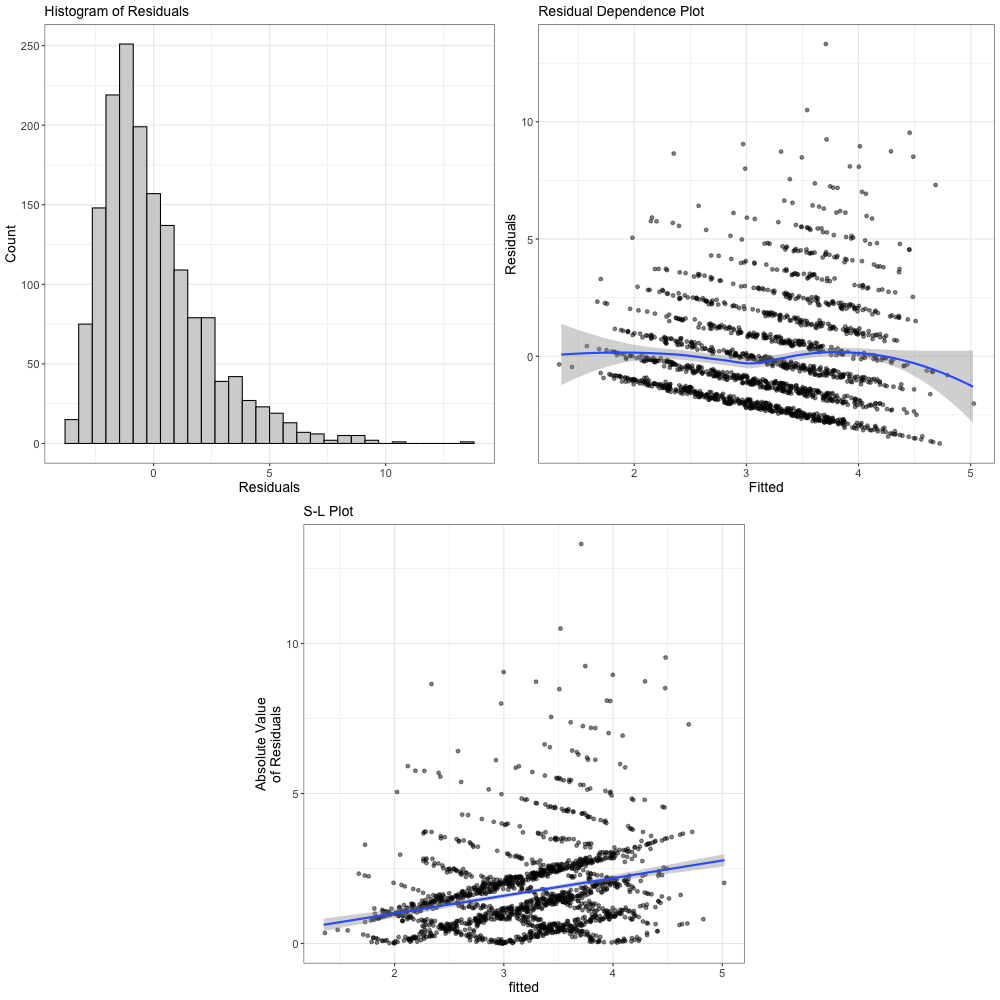

In [97]:
%%R -w 1000 -h 1000

library(flexplot)

visualize(model, plot="residuals")


In [100]:
%%R 

# add residuals and fitted to dataframe

df_fitted <- df %>% mutate(
    fitted = fitted(model),
    residuals = residuals(model)
)

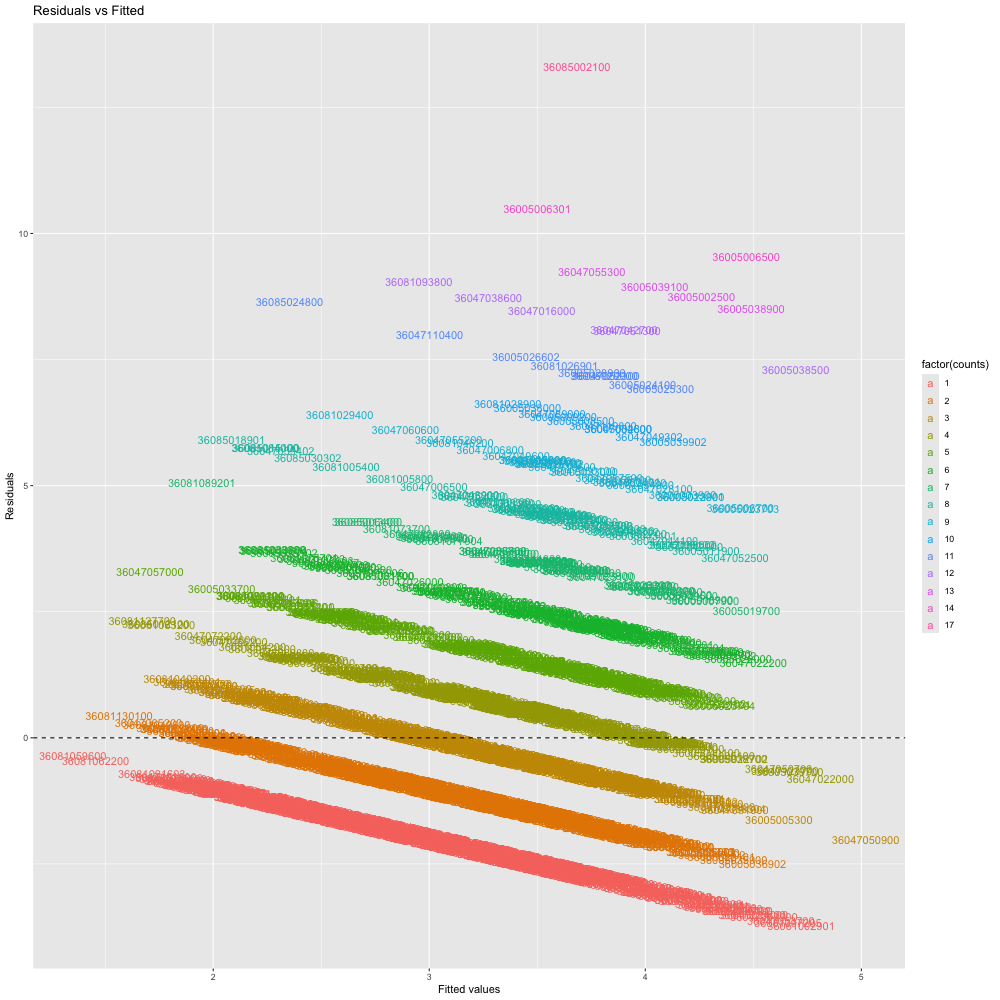

In [112]:
%%R -w 1000 -h 1000


# library(ggrepel)

ggplot(df_fitted) +
    aes(x = fitted, y = residuals, color=factor(counts)) + 
    # geom_point() + 
    geom_text(aes(label = census_tract)) +
    geom_hline(yintercept = 0, linetype = 'dashed') +
    labs(
        title = 'Residuals vs Fitted',
        x = 'Fitted values',
        y = 'Residuals'
    )
    # geom_smooth(method = 'lm')

# Testing with poisson

In [115]:

%%R
# Loading necessary library
library(stats)

# Assuming 'df' is your data frame and 'counts' is your count data column
# Also assuming the predictors are 'med_age_estimate', 'perc_poverty_estimate', 'perc_owners', and 'perc_ethnic'

# Fitting a Poisson regression model
model_poisson <- glm(counts ~ med_age_estimate + perc_poverty_estimate + perc_owners + perc_ethnic, 
                     data = df, 
                     family = poisson(link = "log"))

# Summary of the Poisson model
summary(model_poisson)


Call:
glm(formula = counts ~ med_age_estimate + perc_poverty_estimate + 
    perc_owners, family = poisson(link = "log"), data = df)



Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            1.7113720  0.0982597  17.417  < 2e-16 ***
med_age_estimate      -0.0105326  0.0024698  -4.265 2.00e-05 ***
perc_poverty_estimate  0.0026537  0.0013785   1.925   0.0542 .  
perc_owners           -0.0058257  0.0007649  -7.616 2.62e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2458.7  on 1659  degrees of freedom
Residual deviance: 2254.7  on 1656  degrees of freedom
AIC: 6987.2

Number of Fisher Scoring iterations: 5



In [120]:
%%R

library(MASS)

# Fitting a Poisson regression model
model_poisson <- glm.nb(counts ~ med_age_estimate + perc_poverty_estimate + perc_owners + perc_ethnic, 
                     data = df,
                     init.theta = 1.69,
                     link = "log")

# Summary of the Poisson model
summary(model_poisson)


Call:
glm.nb(formula = counts ~ med_age_estimate + perc_poverty_estimate + 
    perc_owners + perc_ethnic, data = df, init.theta = 7.562468345, 
    link = "log")

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            1.5917674  0.1301845  12.227  < 2e-16 ***
med_age_estimate      -0.0110279  0.0029422  -3.748 0.000178 ***
perc_poverty_estimate  0.0036603  0.0017182   2.130 0.033146 *  
perc_owners           -0.0055402  0.0009103  -6.086 1.16e-09 ***
perc_ethnic            0.0014506  0.0006495   2.233 0.025531 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(7.5625) family taken to be 1)

    Null deviance: 1689.2  on 1659  degrees of freedom
Residual deviance: 1540.8  on 1655  degrees of freedom
AIC: 6841.8

Number of Fisher Scoring iterations: 1


              Theta:  7.562 
          Std. Err.:  0.834 

 2 x log-likelihood:  -6829.825 



Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

